In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
df = pd.read_csv("/dbfs/mnt/analysts/processed_10_15.csv")

FileNotFoundError: ignored

In [ ]:
df = df.dropna(subset=["tweet"])

In [ ]:
len(df)

Out[4]: 23917

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# df = df.sample(frac = 1)

In [ ]:
df.threat.value_counts()

Out[7]: 12 17610
8 3859
0 1826
10 486
9 61
11 36
3 19
7 12
2 3
1 3
6 2
Name: threat, dtype: int64

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 2 GPU(s) available.
We will use the GPU: Tesla K80

In [ ]:
# device2 = torch.device("cuda:1")

In [ ]:
!pip install transformers
from transformers import BertTokenizer

Requirement already satisfied: transformers in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (4.11.3)
Requirement already satisfied: packaging>=20.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (20.4)
Requirement already satisfied: tokenizers<0.11,>=0.10.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (0.10.3)
Requirement already satisfied: requests in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (2.24.0)
Requirement already satisfied: huggingface-hub>=0.0.17 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (0.0.19)
Requirement already satisfied: numpy>=1.17 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (1.19.2)
Requirement already satisfied: tqdm>=4.27 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (4.50.2)
Requirement already satisfied: sacremoses in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (0.0.46)
Requirement already satisfied: filelock in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (3.3.1)
Requirement already satisfied: regex!=2019.12.17 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (2020.10.15)
Requirement already satisfied: pyyaml>=5.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from transformers) (5.4.1)
Requirement already satisfied: six in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from packaging>=20.0->transformers) (1.15.0)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from packaging>=20.0->transformers) (2.4.7)
Requirement already satisfied: idna<3,>=2.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests->transformers) (2.10)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests->transformers) (1.25.11)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests->transformers) (2021.5.30)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests->transformers) (3.0.4)
Requirement already satisfied: typing-extensions in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from huggingface-hub>=0.0.17->transformers) (3.7.4.3)
Requirement already satisfied: click in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from sacremoses->transformers) (7.1.2)
Requirement already satisfied: joblib in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from sacremoses->transformers) (0.17.0)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading: 0%| | 0.00/226k [00:00<?, ?B/s]Downloading: 100%|██████████| 226k/226k [00:00<00:00, 14.1MB/s]
Downloading: 0%| | 0.00/28.0 [00:00<?, ?B/s]Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 51.4kB/s]
Downloading: 0%| | 0.00/455k [00:00<?, ?B/s]Downloading: 100%|██████████| 455k/455k [00:00<00:00, 14.8MB/s]
Downloading: 0%| | 0.00/570 [00:00<?, ?B/s]Downloading: 100%|██████████| 570/570 [00:00<00:00, 1.08MB/s]

In [ ]:
tweets = df.tweet.values
labels = df.threat.values

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for t in tweets:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        t,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', tweets[0])
print('Token IDs:', input_ids[0])

Original: Southeast District Attempt Murder Arrest: 
Token IDs: [101, 4643, 2212, 3535, 4028, 6545, 1024, 102]

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length: 338

In [ ]:
!pip install keras

Collecting keras
 Downloading keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
▎ | 10 kB 33.8 MB/s eta 0:00:01 |▌ | 20 kB 33.5 MB/s eta 0:00:01 |▊ | 30 kB 20.4 MB/s eta 0:00:01 |█ | 40 kB 17.0 MB/s eta 0:00:01 |█▎ | 51 kB 12.5 MB/s eta 0:00:01 |█▌ | 61 kB 13.6 MB/s eta 0:00:01 |█▊ | 71 kB 10.9 MB/s eta 0:00:01 |██ | 81 kB 12.2 MB/s eta 0:00:01 |██▎ | 92 kB 12.8 MB/s eta 0:00:01 |██▌ | 102 kB 11.4 MB/s eta 0:00:01 |██▉ | 112 kB 11.4 MB/s eta 0:00:01 |███ | 122 kB 11.4 MB/s eta 0:00:01 |███▎ | 133 kB 11.4 MB/s eta 0:00:01 |███▌ | 143 kB 11.4 MB/s eta 0:00:01 |███▉ | 153 kB 11.4 MB/s eta 0:00:01 |████ | 163 kB 11.4 MB/s eta 0:00:01 |████▎ | 174 kB 11.4 MB/s eta 0:00:01 |████▌ | 184 kB 11.4 MB/s eta 0:00:01 |████▉ | 194 kB 11.4 MB/s eta 0:00:01 |█████ | 204 kB 11.4 MB/s eta 0:00:01 |█████▎ | 215 kB 11.4 MB/s eta 0:00:01 |█████▋ | 225 kB 11.4 MB/s eta 0:00:01 |█████▉ | 235 kB 11.4 MB/s eta 0:00:01 |██████ | 245 kB 11.4 MB/s eta 0:00:01 |██████▎ | 256 kB 11.4 MB/s eta 0:00:01 |██████▋ | 266 kB 11.4 MB/s eta 0:00:01 |██████▉ | 276 kB 11.4 MB/s eta 0:00:01 |███████ | 286 kB 11.4 MB/s eta 0:00:01 |███████▎ | 296 kB 11.4 MB/s eta 0:00:01 |███████▋ | 307 kB 11.4 MB/s eta 0:00:01 |███████▉ | 317 kB 11.4 MB/s eta 0:00:01 |████████ | 327 kB 11.4 MB/s eta 0:00:01 |████████▍ | 337 kB 11.4 MB/s eta 0:00:01 |████████▋ | 348 kB 11.4 MB/s eta 0:00:01 |████████▉ | 358 kB 11.4 MB/s eta 0:00:01 |█████████ | 368 kB 11.4 MB/s eta 0:00:01 |█████████▍ | 378 kB 11.4 MB/s eta 0:00:01 |█████████▋ | 389 kB 11.4 MB/s eta 0:00:01 |█████████▉ | 399 kB 11.4 MB/s eta 0:00:01 |██████████ | 409 kB 11.4 MB/s eta 0:00:01 |██████████▍ | 419 kB 11.4 MB/s eta 0:00:01 |██████████▋ | 430 kB 11.4 MB/s eta 0:00:01 |██████████▉ | 440 kB 11.4 MB/s eta 0:00:01 |███████████▏ | 450 kB 11.4 MB/s eta 0:00:01 |███████████▍ | 460 kB 11.4 MB/s eta 0:00:01 |███████████▋ | 471 kB 11.4 MB/s eta 0:00:01 |███████████▉ | 481 kB 11.4 MB/s eta 0:00:01 |████████████▏ | 491 kB 11.4 MB/s eta 0:00:01 |████████████▍ | 501 kB 11.4 MB/s eta 0:00:01 |████████████▋ | 512 kB 11.4 MB/s eta 0:00:01 |█████████████ | 522 kB 11.4 MB/s eta 0:00:01 |█████████████▏ | 532 kB 11.4 MB/s eta 0:00:01 |█████████████▍ | 542 kB 11.4 MB/s eta 0:00:01 |█████████████▋ | 552 kB 11.4 MB/s eta 0:00:01 |██████████████ | 563 kB 11.4 MB/s eta 0:00:01 |██████████████▏ | 573 kB 11.4 MB/s eta 0:00:01 |██████████████▍ | 583 kB 11.4 MB/s eta 0:00:01 |██████████████▋ | 593 kB 11.4 MB/s eta 0:00:01 |███████████████ | 604 kB 11.4 MB/s eta 0:00:01 |███████████████▏ | 614 kB 11.4 MB/s eta 0:00:01 |███████████████▍ | 624 kB 11.4 MB/s eta 0:00:01 |███████████████▊ | 634 kB 11.4 MB/s eta 0:00:01 |████████████████ | 645 kB 11.4 MB/s eta 0:00:01 |████████████████▏ | 655 kB 11.4 MB/s eta 0:00:01 |████████████████▍ | 665 kB 11.4 MB/s eta 0:00:01 |████████████████▊ | 675 kB 11.4 MB/s eta 0:00:01 |█████████████████ | 686 kB 11.4 MB/s eta 0:00:01 |█████████████████▏ | 696 kB 11.4 MB/s eta 0:00:01 |█████████████████▍ | 706 kB 11.4 MB/s eta 0:00:01 |█████████████████▊ | 716 kB 11.4 MB/s eta 0:00:01 |██████████████████ | 727 kB 11.4 MB/s eta 0:00:01 |██████████████████▏ | 737 kB 11.4 MB/s eta 0:00:01 |██████████████████▌ | 747 kB 11.4 MB/s eta 0:00:01 |██████████████████▊ | 757 kB 11.4 MB/s eta 0:00:01 |███████████████████ | 768 kB 11.4 MB/s eta 0:00:01 |███████████████████▏ | 778 kB 11.4 MB/s eta 0:00:01 |███████████████████▌ | 788 kB 11.4 MB/s eta 0:00:01 |███████████████████▊ | 798 kB 11.4 MB/s eta 0:00:01 |████████████████████ | 808 kB 11.4 MB/s eta 0:00:01 |████████████████████▏ | 819 kB 11.4 MB/s eta 0:00:01 |████████████████████▌ | 829 kB 11.4 MB/s eta 0:00:01 |████████████████████▊ | 839 kB 11.4 MB/s eta 0:00:01 |█████████████████████ | 849 kB 11.4 MB/s eta 0:00:01 |█████████████████████▎ | 860 kB 11.4 MB/s eta 0:00:01 |█████████████████████▌ | 870 kB 11.4 MB/s eta 0:00:01 |█████████████████████▊ | 880 kB 11.4 MB/s eta 0:00:01 |██████████████████████ | 890 kB 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 256

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')

Padding/truncating all sentences to 256 values...

Padding token: "[PAD]", ID: 0

Done.

In [ ]:
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.2)

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

n_classes = 13

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = n_classes, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
).cuda()

# Tell pytorch to run this model on the GPU.
# model.cuda()

Downloading: 0%| | 0.00/420M [00:00<?, ?B/s]Downloading: 1%|▏ | 5.66M/420M [00:00<00:07, 59.4MB/s]Downloading: 3%|▎ | 12.2M/420M [00:00<00:06, 62.0MB/s]Downloading: 5%|▍ | 19.0M/420M [00:00<00:06, 64.4MB/s]Downloading: 6%|▌ | 25.8M/420M [00:00<00:06, 66.2MB/s]Downloading: 8%|▊ | 32.6M/420M [00:00<00:06, 67.7MB/s]Downloading: 9%|▉ | 39.4M/420M [00:00<00:05, 68.8MB/s]Downloading: 11%|█ | 46.2M/420M [00:00<00:05, 69.6MB/s]Downloading: 13%|█▎ | 52.9M/420M [00:00<00:05, 69.8MB/s]Downloading: 14%|█▍ | 59.7M/420M [00:00<00:05, 70.2MB/s]Downloading: 16%|█▌ | 66.4M/420M [00:01<00:05, 70.3MB/s]Downloading: 17%|█▋ | 73.2M/420M [00:01<00:05, 70.3MB/s]Downloading: 19%|█▉ | 79.8M/420M [00:01<00:05, 69.5MB/s]Downloading: 21%|██ | 86.5M/420M [00:01<00:05, 69.7MB/s]Downloading: 22%|██▏ | 93.1M/420M [00:01<00:05, 68.4MB/s]Downloading: 24%|██▎ | 99.7M/420M [00:01<00:04, 68.7MB/s]Downloading: 25%|██▌ | 106M/420M [00:01<00:04, 68.9MB/s] Downloading: 27%|██▋ | 113M/420M [00:01<00:04, 69.1MB/s]Downloading: 28%|██▊ | 120M/420M [00:01<00:04, 69.1MB/s]Downloading: 30%|███ | 126M/420M [00:01<00:04, 69.1MB/s]Downloading: 32%|███▏ | 133M/420M [00:02<00:04, 69.4MB/s]Downloading: 33%|███▎ | 139M/420M [00:02<00:04, 69.3MB/s]Downloading: 35%|███▍ | 146M/420M [00:02<00:04, 69.4MB/s]Downloading: 36%|███▋ | 153M/420M [00:02<00:04, 69.8MB/s]Downloading: 38%|███▊ | 159M/420M [00:02<00:04, 68.2MB/s]Downloading: 40%|███▉ | 166M/420M [00:02<00:03, 66.6MB/s]Downloading: 41%|████ | 172M/420M [00:02<00:03, 65.5MB/s]Downloading: 43%|████▎ | 179M/420M [00:02<00:03, 65.2MB/s]Downloading: 44%|████▍ | 185M/420M [00:02<00:03, 64.7MB/s]Downloading: 45%|████▌ | 191M/420M [00:02<00:03, 64.3MB/s]Downloading: 47%|████▋ | 197M/420M [00:03<00:03, 64.5MB/s]Downloading: 48%|████▊ | 203M/420M [00:03<00:03, 64.5MB/s]Downloading: 50%|████▉ | 210M/420M [00:03<00:03, 64.8MB/s]Downloading: 51%|█████▏ | 216M/420M [00:03<00:03, 64.8MB/s]Downloading: 53%|█████▎ | 222M/420M [00:03<00:03, 64.7MB/s]Downloading: 54%|█████▍ | 228M/420M [00:03<00:03, 64.4MB/s]Downloading: 56%|█████▌ | 234M/420M [00:03<00:03, 64.5MB/s]Downloading: 57%|█████▋ | 240M/420M [00:03<00:03, 47.7MB/s]Downloading: 59%|█████▊ | 246M/420M [00:03<00:03, 50.6MB/s]Downloading: 60%|█████▉ | 252M/420M [00:04<00:03, 52.4MB/s]Downloading: 61%|██████▏ | 258M/420M [00:04<00:03, 55.3MB/s]Downloading: 63%|██████▎ | 264M/420M [00:04<00:02, 57.9MB/s]Downloading: 64%|██████▍ | 270M/420M [00:04<00:02, 59.6MB/s]Downloading: 66%|██████▌ | 276M/420M [00:04<00:02, 59.4MB/s]Downloading: 67%|██████▋ | 282M/420M [00:04<00:02, 60.6MB/s]Downloading: 69%|██████▊ | 288M/420M [00:04<00:02, 61.3MB/s]Downloading: 70%|██████▉ | 294M/420M [00:04<00:02, 61.8MB/s]Downloading: 71%|███████▏ | 300M/420M [00:04<00:02, 62.1MB/s]Downloading: 73%|███████▎ | 306M/420M [00:04<00:01, 62.5MB/s]Downloading: 74%|███████▍ | 312M/420M [00:05<00:01, 63.8MB/s]Downloading: 76%|███████▌ | 319M/420M [00:05<00:01, 64.7MB/s]Downloading: 77%|███████▋ | 325M/420M [00:05<00:01, 66.4MB/s]Downloading: 79%|███████▉ | 332M/420M [00:05<00:01, 66.6MB/s]Downloading: 81%|████████ | 338M/420M [00:05<00:01, 67.1MB/s]Downloading: 82%|████████▏ | 345M/420M [00:05<00:01, 67.6MB/s]Downloading: 84%|████████▎ | 351M/420M [00:05<00:01, 67.4MB/s]Downloading: 85%|████████▌ | 358M/420M [00:05<00:00, 67.7MB/s]Downloading: 87%|████████▋ | 364M/420M [00:05<00:00, 65.6MB/s]Downloading: 88%|████████▊ | 371M/420M [00:05<00:00, 64.9MB/s]Downloading: 90%|████████▉ | 377M/420M [00:06<00:00, 65.1MB/s]Downloading: 91%|█████████▏| 383M/420M [00:06<00:00, 65.9MB/s]Downloading: 93%|█████████▎| 390M/420M [00:06<00:00, 67.0MB/s]Downloading: 94%|█████████▍| 397M/420M [00:06<00:00, 67.5MB/s]Downloading: 96%|█████████▌| 403M/420M [00:06<00:00, 63.9MB/s]Downloading: 97%|█████████▋| 409M/420M [00:06<00:00, 63.3MB/s]Downloading: 99%|█████████▉| 415M/420M [00:06<00:00, 62.9MB/s]Downloading: 100%|██████████| 420M/420M [00:06<00:00, 64.9MB/s]
Some weights of the m

In [ ]:
# import torch.nn as nn

In [ ]:

# criterion = nn.CrossEntropyLoss()

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc
  
# accuracy_stats = {
#     'train': [],
#     "val": []
# }
# loss_stats = {
#     'train': [],
#     "val": []
# }

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# !nvidia-smi

In [ ]:
# !pip install gputil
# import GPUtil
# GPUtil.showUtilization()

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
predicted_labels = []
# For each epoch...
for epoch_i in range(epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    epoch_pred_lab = []
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        epoch_pred_lab += np.argmax(logits, axis=1).flatten().tolist()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1
    predicted_labels.append(epoch_pred_lab)
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.5f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")

======== Epoch 1 / 3 ========
Training...
 Batch 40 of 598. Elapsed: 0:01:38.
 Batch 80 of 598. Elapsed: 0:03:18.
 Batch 120 of 598. Elapsed: 0:04:59.
 Batch 160 of 598. Elapsed: 0:06:41.
 Batch 200 of 598. Elapsed: 0:08:22.
 Batch 240 of 598. Elapsed: 0:10:04.
 Batch 280 of 598. Elapsed: 0:11:45.
 Batch 320 of 598. Elapsed: 0:13:27.
 Batch 360 of 598. Elapsed: 0:15:08.
 Batch 400 of 598. Elapsed: 0:16:49.
 Batch 440 of 598. Elapsed: 0:18:31.
 Batch 480 of 598. Elapsed: 0:20:12.
 Batch 520 of 598. Elapsed: 0:21:54.
 Batch 560 of 598. Elapsed: 0:23:35.

 Average training loss: 0.46
 Training epcoh took: 0:25:11

Running Validation...
 Accuracy: 0.91646
 Validation took: 0:02:27

======== Epoch 2 / 3 ========
Training...
 Batch 40 of 598. Elapsed: 0:01:41.
 Batch 80 of 598. Elapsed: 0:03:23.
 Batch 120 of 598. Elapsed: 0:05:04.
 Batch 160 of 598. Elapsed: 0:06:46.
 Batch 200 of 598. Elapsed: 0:08:27.
 Batch 240 of 598. Elapsed: 0:10:09.
 Batch 280 of 598. Elapsed: 0:11:50.
 Batch 320 of 598. Elapsed: 0:13:32.
 Batch 360 of 598. Elapsed: 0:15:13.
 Batch 400 of 598. Elapsed: 0:16:55.
 Batch 440 of 598. Elapsed: 0:18:36.
 Batch 480 of 598. Elapsed: 0:20:17.
 Batch 520 of 598. Elapsed: 0:21:59.
 Batch 560 of 598. Elapsed: 0:23:40.

 Average training loss: 0.24
 Training epcoh took: 0:25:16

Running Validation...
 Accuracy: 0.91646
 Validation took: 0:02:27

======== Epoch 3 / 3 ========
Training...
 Batch 40 of 598. Elapsed: 0:01:41.
 Batch 80 of 598. Elapsed: 0:03:23.
 Batch 120 of 598. Elapsed: 0:05:04.
 Batch 160 of 598. Elapsed: 0:06:46.
 Batch 200 of 598. Elapsed: 0:08:27.
 Batch 240 of 598. Elapsed: 0:10:08.
 Batch 280 of 598. Elapsed: 0:11:50.
 Batch 320 of 598. Elapsed: 0:13:31.
 Batch 360 of 598. Elapsed: 0:15:12.
 Batch 400 of 598. Elapsed: 0:16:54.
 Batch 440 of 598. Elapsed: 0:18:35.
 Batch 480 of 598. Elapsed: 0:20:16.
 Batch 520 of 598. Elapsed: 0:21:57.
 Batch 560 of 598. Elapsed: 0:23:39.

 Average training loss: 0.17
 Training epcoh took: 0:25:15

Running Validation...
 Accuracy: 0.91812
 Validation took: 0:02:27

Training complete!

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Counter(predicted_labels[2])

In [ ]:
lab = [i for i in range(13)]
cm = confusion_matrix(y_true = validation_labels.tolist(), y_pred = predicted_labels[-1], labels = lab, normalize = "true")

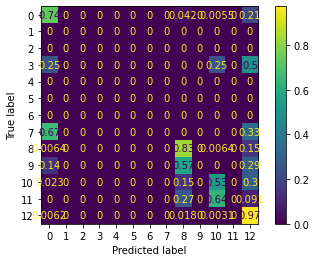

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lab)
img1 = disp.plot()

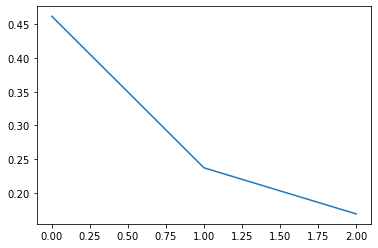

In [ ]:
plt.plot(loss_values, label='Training loss')
plt.savefig("/dbfs/mnt/analysts/avg_loss")
plt.show()
true_labels = validation_labels.tolist()


In [ ]:
f1_score(y_true = true_labels, y_pred = predicted_labels[-1], labels = lab, average=None, zero_division=0)

Out[47]: array([0.80664653, 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0.8496732 , 0. ,
 0.58385093, 0. , 0.95475428])

In [ ]:
f1_score(y_true = true_labels, y_pred = predicted_labels[-1], labels = lab, average="weighted", zero_division=0)

Out[48]: 0.9132583170215399

In [ ]:
f1_score(y_true = true_labels, y_pred = predicted_labels[-1], labels = lab, average="micro", zero_division=0)

Out[49]: 0.9182692307692307

In [ ]:
print(classification_report(y_true = true_labels, y_pred = predicted_labels[-1], labels = lab, zero_division=0, digits=4))

precision recall f1-score support

 0 0.8870 0.7396 0.8066 361
 1 0.0000 0.0000 0.0000 0
 2 0.0000 0.0000 0.0000 0
 3 0.0000 0.0000 0.0000 4
 4 0.0000 0.0000 0.0000 0
 5 0.0000 0.0000 0.0000 0
 6 0.0000 0.0000 0.0000 0
 7 0.0000 0.0000 0.0000 3
 8 0.8655 0.8344 0.8497 779
 9 0.0000 0.0000 0.0000 14
 10 0.6438 0.5341 0.5839 88
 11 0.0000 0.0000 0.0000 11
 12 0.9371 0.9730 0.9548 3524

 micro avg 0.9183 0.9183 0.9183 4784
 macro avg 0.2564 0.2370 0.2458 4784
weighted avg 0.9100 0.9183 0.9133 4784

In [ ]:
# from transformers import convert_ids_to_tokens
wrong = []
for i in range(len(true_labels)):
  if predicted_labels[-1][i] != true_labels[i]:
    wrong.append([tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(validation_inputs[i], skip_special_tokens=True)), predicted_labels[-1][i], true_labels[i]])

In [ ]:
wrong_df = pd.DataFrame(wrong, columns =['text', 'predicted', 'true']) 
print(wrong_df) 

text predicted true
0 last chance to support nnedv when you shop @ a... 8 12
1 @ thecity2 with whos still available at this p... 0 12
2 @ teslacharts there ' s no limit to idiocy and... 10 8
3 the usg needs to " be careful in the responses... 8 12
4 and if you ' re curious about the real world i... 8 10
.. ... ... ...
386 @ fairquestionno @ skye _ daddy @ comptonmadem... 12 10
387 has to be one of the best shoes of the 70s and... 12 0
388 writing updates : a couple of short , co - aut... 8 12
389 is anyone else getting random porn scam texts ... 8 10
390 @ cszabla @ profmusgrave whoa that ' s a reall... 12 0

[391 rows x 3 columns]

In [ ]:
# wrong_df.to_csv("/dbfs/mnt/analysts/anomalies.csv")